#  SEB collection analysis
Notebook for application of dtime method onto SRB moments

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Load Dataset

In [2]:
path = '../datasets/preprocessed/'
stim = pd.read_hdf(path+'relationalDatabase.h5', 'Events').set_index('index')
stim.drop(labels=['MotiveExpTimeSecs'], axis=1, inplace=True)

stim.head()

,Frame,Time,visible,speed,session_id
index,,,,,
0,0,0.000000,0,0.0,0
1,0,0.000000,0,0.0,0
2,1,0.004167,0,0.0,0
3,2,0.008333,0,0.0,0
4,3,0.012500,0,0.0,0


In [3]:
SRB = pd.read_hdf(path+'SRB.h5', 'Rat_Behavior').set_index('index')
SRB.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id
index,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,0,103.496176,-5.945695,2.043517,1,-14.0,0


In [4]:
rat0 = pd.read_hdf(path+'velocityDatabase.h5', 'Rat_Behavior').set_index('index')
rat0.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var
index,,,,,,,,,,,,,
1,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,0,-87.705039,156.977244,NaN
2,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,0,-87.034598,160.892886,NaN
3,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,0,-86.343297,165.938758,NaN


In [5]:
rat = pd.merge(rat0, stim, on=['Frame', 'Time', 'session_id'])
rat.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed
0,21,0.087500,-0.056324,0.072395,-0.049580,-0.630137,-0.768168,0.025253,0,0,-87.705039,156.977244,NaN,0,0.0
1,22,0.091667,-0.056285,0.072442,-0.049525,-0.630120,-0.767833,0.032642,0,0,-87.034598,160.892886,NaN,0,0.0
2,23,0.095833,-0.056241,0.072488,-0.049468,-0.629928,-0.767622,0.040258,0,0,-86.343297,165.938758,NaN,0,0.0


## Limits for data detection

In [6]:
## TODO: change values
limits=pd.DataFrame({'speed':[ 7, 14,  28, -7, -14  , -28],
                     'min'  :[ 1,  5,  13, -9, -21.5, -30],
                     'max'  :[ 9, 18,  30, -1, -5   , -13]})
limits

,max,min,speed
0,9,1.0,7
1,18,5.0,14
2,30,13.0,28
3,-1,-9.0,-7
4,-5,-21.5,-14
5,-13,-30.0,-28


### Looking for Stimuli Related Behavior with given limits - on SRB

In [7]:
SRB_svf = SRB.copy()

In [8]:
SRB_svf['Dmin'], SRB_svf['Dmax'] = 0, 0
SRB_svf['change'] = False
for index, row in limits.iterrows():
    SRB_svf['change'] = (SRB_svf['Dmin']==0) & (SRB_svf['speed']==row['speed'])
    SRB_svf['Dmin'] = np.where(SRB_svf['change']==True, row['min'], SRB_svf['Dmin'])
    SRB_svf['Dmax'] = np.where(SRB_svf['change']==True, row['max'], SRB_svf['Dmax'])

SRB_svf.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id,Dmin,Dmax,change
index,,,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0,-21.5,-5.0,False
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0,-21.5,-5.0,False
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,0,103.496176,-5.945695,2.043517,1,-14.0,0,-21.5,-5.0,False
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,0,103.474713,-5.150755,2.037481,1,-14.0,0,-21.5,-5.0,False
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,0,103.452648,-5.295200,2.033607,1,-14.0,0,-21.5,-5.0,False


In [9]:
SRB_svf['SRB'] = (SRB_svf['U'] > SRB_svf['Dmin']) & (SRB_svf['U'] < SRB_svf['Dmax'])
SRB_svf.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,SRB_id,Dmin,Dmax,change,SRB
index,,,,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,0,103.559478,-9.052831,2.093787,1,-14.0,0,-21.5,-5.0,False,True
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,0,103.520946,-9.246986,2.068201,1,-14.0,0,-21.5,-5.0,False,True
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,0,103.496176,-5.945695,2.043517,1,-14.0,0,-21.5,-5.0,False,True
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,0,103.474713,-5.150755,2.037481,1,-14.0,0,-21.5,-5.0,False,True
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,0,103.452648,-5.295200,2.033607,1,-14.0,0,-21.5,-5.0,False,True


### Removing not needed columns

In [10]:
SRB_svfd = SRB_svf.drop(['Filtered', 'change'], axis=1)
SRB_svfd.head(3)

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,U,U_var,visible,speed,SRB_id,Dmin,Dmax,SRB
index,,,,,,,,,,,,,,,,,,
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,103.559478,-9.052831,2.093787,1,-14.0,0,-21.5,-5.0,True
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,103.520946,-9.246986,2.068201,1,-14.0,0,-21.5,-5.0,True
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,103.496176,-5.945695,2.043517,1,-14.0,0,-21.5,-5.0,True


###  Merging close events & Deleting short SRB

In [11]:
# MERGING SRB THAT HAVE REALLY SHORT BREAKS
SRB_up2 = pd.DataFrame()
for name, dd in SRB_svfd.groupby('session_id'):   
    # calculating dtime - time difference between srb    
    dfSRBtemp = dd[dd['SRB']==True]
    dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
    df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df2.fillna(0, inplace=True)
    
    #special time cases
    dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.2)]
    dftemp = dftemp.reset_index(drop=True)

    maxF, minF = {}, {}
    minF={}
    df2['SRBall'] = df2['SRB']     
    df2['SRBtt'] = False
    # merge super close events
    for i in np.arange(0,len(dftemp)):
        maxF[i] = dftemp.Time[i]
        minF[i] = maxF[i]-dftemp.dtime[i]
    
        df2['SRBtt'] = (df2['Time']>minF[i]) & (df2['Time']<maxF[i]) | (df2['SRBtt']==True)
        df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
        
        
    df2['dtimeA'] = df2['dtime']
    df2.drop('dtime', inplace=True, axis=1)

    # DELETING SHORT SRB
    # calculating dtime - time of srb    
    dfSRBtemp2 = df2[df2['SRBall']==False]
    dfSRBtemp2['dtime'] = dfSRBtemp2['Time'].diff(1)
    df22 = pd.merge(df2, dfSRBtemp2[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df22.fillna(0, inplace=True)
    
    #special time cases
    dftemp2 = dfSRBtemp2[(dfSRBtemp2['dtime']<0.4) & (dfSRBtemp2['dtime']>0.0049)]
    dftemp2 = dftemp2.reset_index(drop=True)    
    maxF2, minF2 = {}, {}
    df22['SRBall2'] = df22['SRBall']     
    df22['SRBtt2'] = False
    
    # delete short events
    for i in np.arange(0,len(dftemp2)):
        maxF2[i] = dftemp2.Time[i]
        minF2[i] = dftemp2.Time[i] - dftemp2.dtime[i]
        df22['SRBtt2'] = ((df22['Time']>=minF2[i]) & (df22['Time']<=maxF2[i])) | (df22['SRBtt2']==True)
        df22['SRBall2'] = (df22['SRBtt2']==False) & (df22['SRBall2'] == True)
        
    SRB_up2 = pd.concat([SRB_up2, df22], axis=0, ignore_index=True)    

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Looking for Stimuli Related Behavior with given limits - on Rat raw

In [12]:
rat_svf = rat[rat.Filtered == 1]
rat_svf['Dmin'], rat_svf['Dmax'] = 0, 0
rat_svf['change'] = False
for index, row in limits.iterrows():
    rat_svf['change'] = (rat_svf['Dmin']==0) & (rat_svf['speed']==row['speed'])
    rat_svf['Dmin'] = np.where(rat_svf['change']==True, row['min'], rat_svf['Dmin'])
    rat_svf['Dmax'] = np.where(rat_svf['change']==True, row['max'], rat_svf['Dmax'])

rat_svf.head()

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Filtered,Theta,U,U_var,visible,speed,Dmin,Dmax,change
13,34,0.141667,-0.055494,0.072800,-0.048448,-0.611095,-0.769759,0.145989,0,1,-76.563981,256.574411,NaN,0,0.0,0.0,0.0,False
14,35,0.145833,-0.055403,0.072771,-0.048293,-0.605280,-0.771008,0.157224,0,1,-75.438984,270.042327,NaN,0,0.0,0.0,0.0,False
15,36,0.150000,-0.055312,0.072712,-0.048111,-0.598225,-0.772357,0.168890,0,1,-74.234640,289.019430,NaN,0,0.0,0.0,0.0,False
16,37,0.154167,-0.055209,0.072630,-0.047910,-0.590028,-0.773953,0.180413,0,1,-72.997945,296.783166,NaN,0,0.0,0.0,0.0,False
197,257,1.070833,-0.023622,0.070577,0.047583,-0.383131,-0.468280,0.755344,0,1,-26.895340,-96.039097,54.961321,0,0.0,0.0,0.0,False


In [13]:
rat_svf['SRB'] = (rat_svf['U'] > rat_svf['Dmin']) & (rat_svf['U'] < rat_svf['Dmax'])

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [14]:
rat_svfd = rat_svf.drop(['Filtered', 'change'], axis=1)

In [15]:
# MERGING SRB THAT HAVE REALLY SHORT BREAKS
rat_up2 = pd.DataFrame()
for name, dd in rat_svfd.groupby('session_id'):   
    # calculating dtime - time difference between srb    
    dfSRBtemp = dd[dd['SRB']==True]
    dfSRBtemp['dtime'] = dfSRBtemp['Time'].diff(1)
    df2 = pd.merge(dd, dfSRBtemp[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df2.fillna(0, inplace=True)
    
    #special time cases
    dftemp = dfSRBtemp[(dfSRBtemp['dtime']>0.005) & (dfSRBtemp['dtime']<0.1)]
    dftemp = dftemp.reset_index(drop=True)

    maxF, minF = {}, {}
    minF={}
    df2['SRBall'] = df2['SRB']     
    df2['SRBtt'] = False
    # merge super close events
    for i in np.arange(0,len(dftemp)):
        maxF[i] = dftemp.Time[i]
        minF[i] = maxF[i]-dftemp.dtime[i]
    
        df2['SRBtt'] = (df2['Time']>minF[i]) & (df2['Time']<maxF[i]) | (df2['SRBtt']==True)
        df2['SRBall'] = (df2['SRBtt']==True) | (df2['SRBall']==True)
        
        
    df2['dtimeA'] = df2['dtime']
    df2.drop('dtime', inplace=True, axis=1)

    # DELETING SHORT SRB
    # calculating dtime - time of srb    
    dfSRBtemp2 = df2[df2['SRBall']==False]
    dfSRBtemp2['dtime'] = dfSRBtemp2['Time'].diff(1)
    df22 = pd.merge(df2, dfSRBtemp2[['dtime', 'Frame', 'session_id','Time']], on=['Frame', 'session_id','Time'], how='outer')
    df22.fillna(0, inplace=True)
    
    #special time cases
    dftemp2 = dfSRBtemp2[(dfSRBtemp2['dtime']<0.4) & (dfSRBtemp2['dtime']>0.0049)]
    dftemp2 = dftemp2.reset_index(drop=True)    
    maxF2, minF2 = {}, {}
    df22['SRBall2'] = df22['SRBall']     
    df22['SRBtt2'] = False
    
    # delete short events
    for i in np.arange(0,len(dftemp2)):
        maxF2[i] = dftemp2.Time[i]
        minF2[i] = dftemp2.Time[i] - dftemp2.dtime[i]
        df22['SRBtt2'] = ((df22['Time']>=minF2[i]) & (df22['Time']<=maxF2[i])) | (df22['SRBtt2']==True)
        df22['SRBall2'] = (df22['SRBtt2']==False) & (df22['SRBall2'] == True)
        
    rat_up2 = pd.concat([rat_up2, df22], axis=0, ignore_index=True)    

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Plotting example plots with automatic SRB

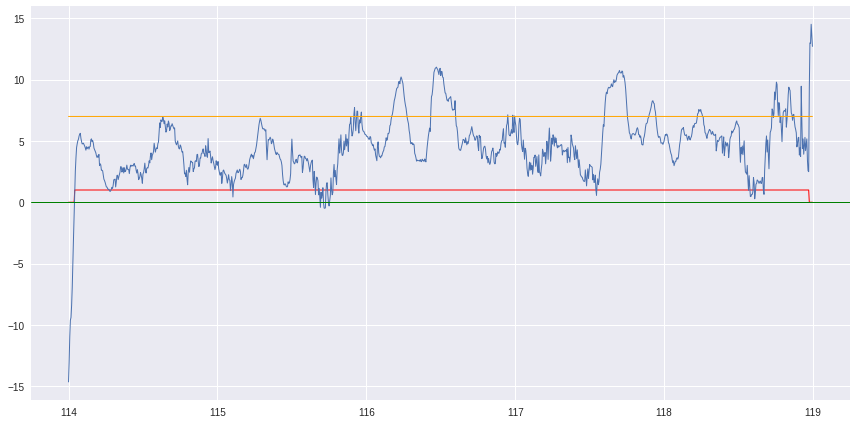

In [16]:
mask = (SRB_up2.session_id == 7) & (SRB_up2.SRB_id == 1)
temp = SRB_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

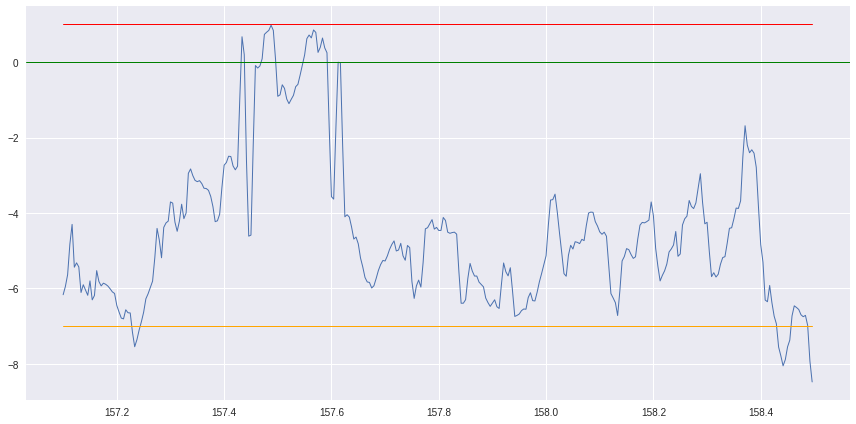

In [17]:
mask = (SRB_up2.session_id == 7) & (SRB_up2.SRB_id == 2)
temp = SRB_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

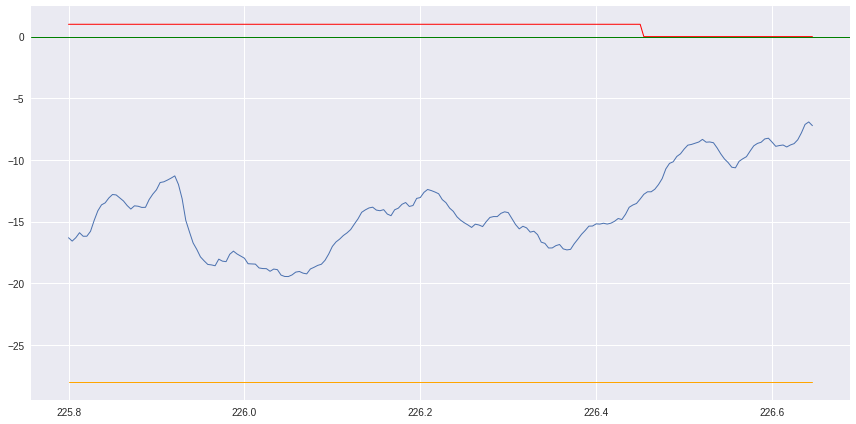

In [18]:
mask = (SRB_up2.session_id == 7) & (SRB_up2.SRB_id == 4)
temp = SRB_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');

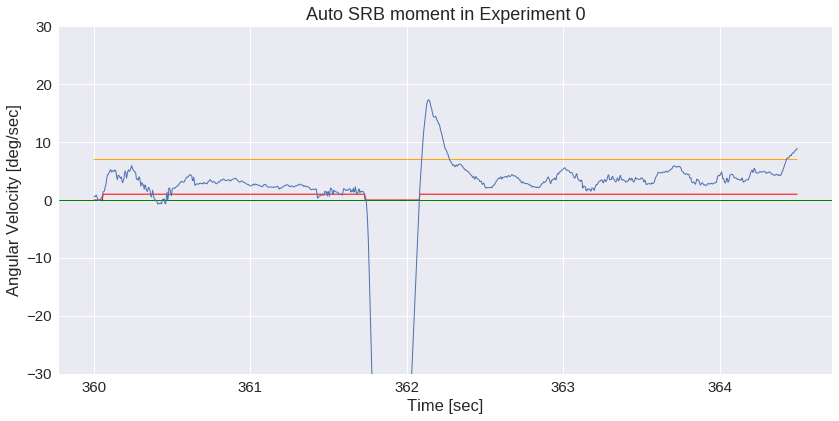

In [19]:
sns.set(font_scale=1.5)
mask = (SRB_up2.session_id == 0) & (SRB_up2.SRB_id == 4)
temp = SRB_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id', ylim=[-30, 30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')

plt.title("Auto SRB moment in Experiment 0");
g.savefig('plots/SRB_time_velo_auto.png', dpi=300)

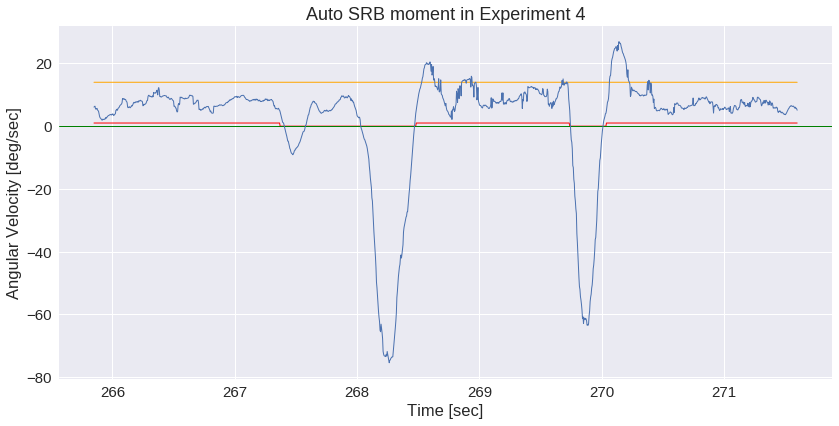

In [20]:
sns.set(font_scale=1.5)
mask = (SRB_up2.session_id == 4) & (SRB_up2.SRB_id == 5)
temp = SRB_up2[mask]

g = sns.FacetGrid(data=temp, size=6, aspect=2, hue='SRB_id')#, ylim=[-30, 30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.plot, "Time", "speed" , alpha=1, linewidth=1, color="orange");
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.plot, "Time", "U"     , alpha=1, linewidth=1);
g.set_ylabels('Angular Velocity [deg/sec]')
g.set_xlabels('Time [sec]')

plt.title("Auto SRB moment in Experiment 4");
g.savefig('plots/SRB_time_velo_auto2.png', dpi=300)

## Ratup2 Visualization

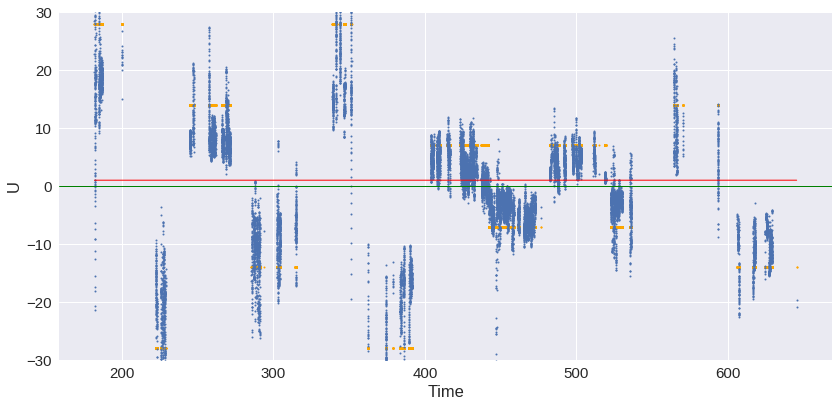

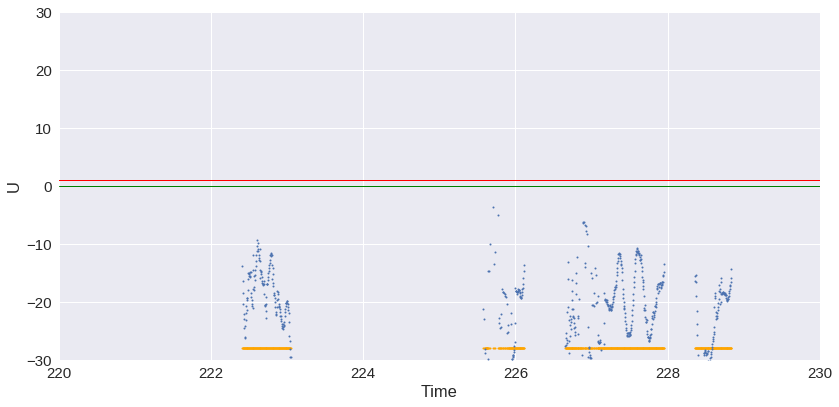

In [21]:
mask = (rat_up2.session_id == 4) & (rat_up2.SRBall2 == True)
temp = rat_up2[mask]
# a, b = 0, 300

# g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a, b], ylim=[-30,30])
g = sns.FacetGrid(data=temp, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.scatter, "Time", "speed" , alpha=1, linewidth=1, color="orange", s=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.scatter, "Time", "U"     , alpha=1, linewidth=1, s=1);

mask = (rat_up2.session_id == 4) & (rat_up2.SRBall2 == True)
temp = rat_up2[mask]
a, b =220, 230

g = sns.FacetGrid(data=temp, size=6, aspect=2, xlim=[a, b], ylim=[-30,30])
# g = sns.FacetGrid(data=temp, size=6, aspect=2, ylim=[-30,30])
g.map(plt.plot, "Time", "SRBall2" , alpha=1, linewidth=1, color='red');
g.map(plt.scatter, "Time", "speed" , alpha=1, linewidth=1, color="orange", s=1);
g.map(plt.axhline, y=0, alpha=1, linewidth=1, color='green');
g.map(plt.scatter, "Time", "U"     , alpha=1, linewidth=1, s=1);


## Statistical evaluation

In [22]:
SRB_up2.head()

,Frame,Time,X_Pos,Y_Pos,Z_Pos,X_Ori,Y_Ori,Z_Ori,session_id,Theta,...,SRB_id,Dmin,Dmax,SRB,SRBall,SRBtt,dtimeA,dtime,SRBall2,SRBtt2
0,37440,156.000010,0.093441,0.165644,-0.054762,0.879993,0.424692,-0.212234,0,103.559478,...,0,-21.5,-5.0,True,True,False,0.000000,0.0,True,False
1,37441,156.004177,0.093453,0.165645,-0.054730,0.880194,0.424575,-0.211656,0,103.520946,...,0,-21.5,-5.0,True,True,False,0.004167,0.0,True,False
2,37442,156.008343,0.093482,0.165663,-0.054691,0.880144,0.424881,-0.211242,0,103.496176,...,0,-21.5,-5.0,True,True,False,0.004166,0.0,True,False
3,37443,156.012510,0.093516,0.165688,-0.054651,0.880004,0.425362,-0.210859,0,103.474713,...,0,-21.5,-5.0,True,True,False,0.004167,0.0,True,False
4,37444,156.016677,0.093554,0.165714,-0.054609,0.879837,0.425904,-0.210461,0,103.452648,...,0,-21.5,-5.0,True,True,False,0.004167,0.0,True,False


## Distribution of Velocities in SRB

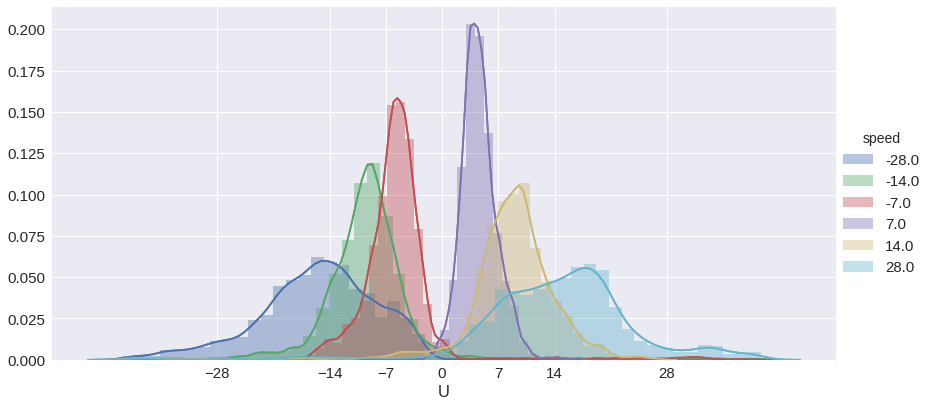

In [23]:
mask_srb = np.abs(SRB_up2.U) < 40
srb = SRB_up2[mask_srb]
g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

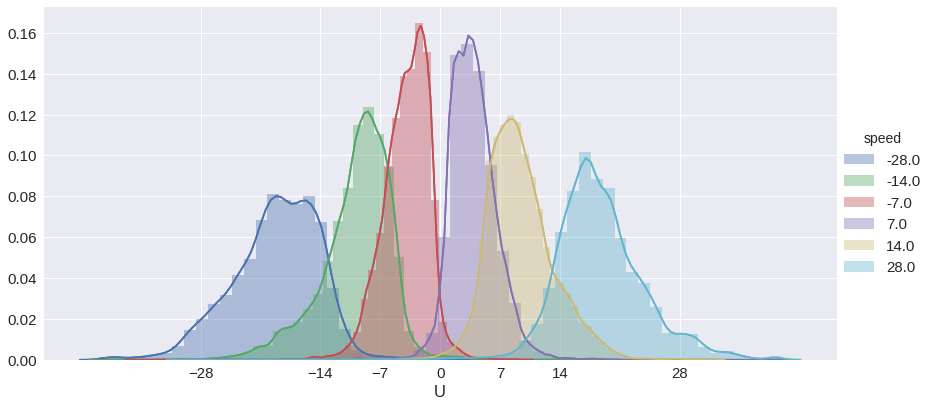

In [24]:
mask_srb = (np.abs(rat_up2.U) < 40) & (rat_up2.SRBall2 == True)
srb = rat_up2[mask_srb]
g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

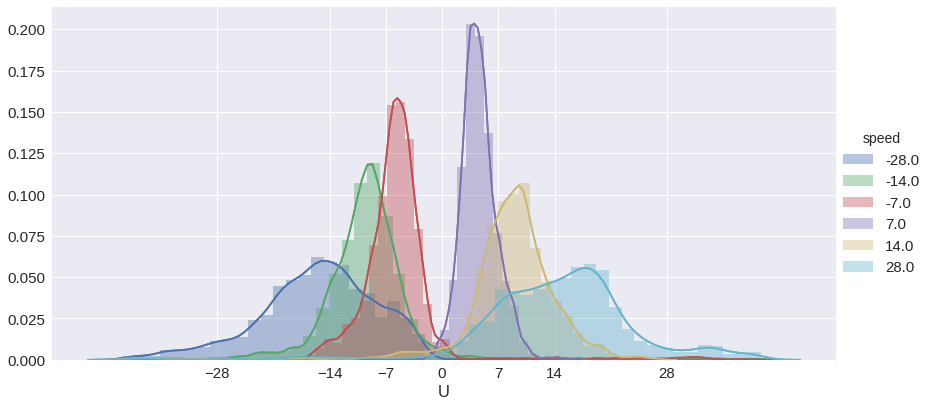

In [25]:
mask_srb = np.abs(SRB_up2.U) < 40
srb = SRB_up2[mask_srb]
g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

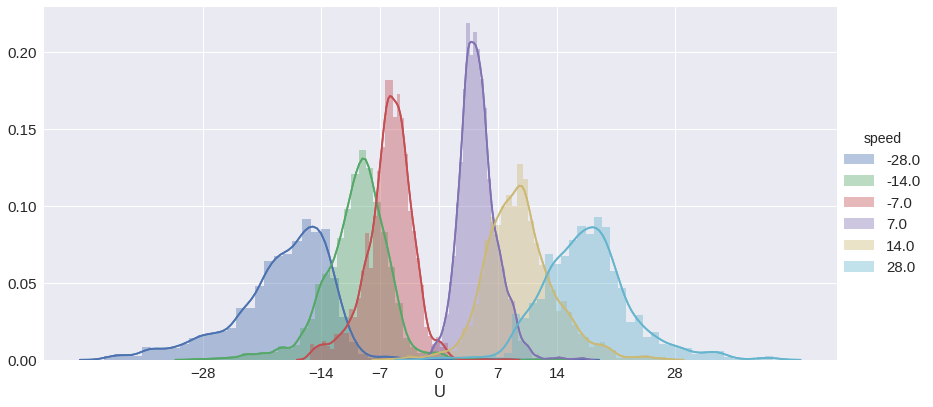

In [26]:
mask_srb = (np.abs(SRB_up2.U) < 40) & (SRB_up2.SRBall2 == True)
srb = SRB_up2[mask_srb]
g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.distplot, 'U');
g.map(sns.kdeplot, 'U').add_legend()

In [27]:
mask_srb = (np.abs(SRB_up2.U) < 40) & (SRB_up2.SRBall2 == True)
len(SRB[mask_srb])

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


25659

In [28]:
mask_srb = (np.abs(SRB_up2.U) < 40)
len(SRB[mask_srb])

/home/ateska/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


29999

In [29]:
mask_srb = (np.abs(rat_up2.U) < 40) & (rat_up2.SRBall2 == True)
len(rat_up2[mask_srb])

145849

## Distribition of velocities for each session

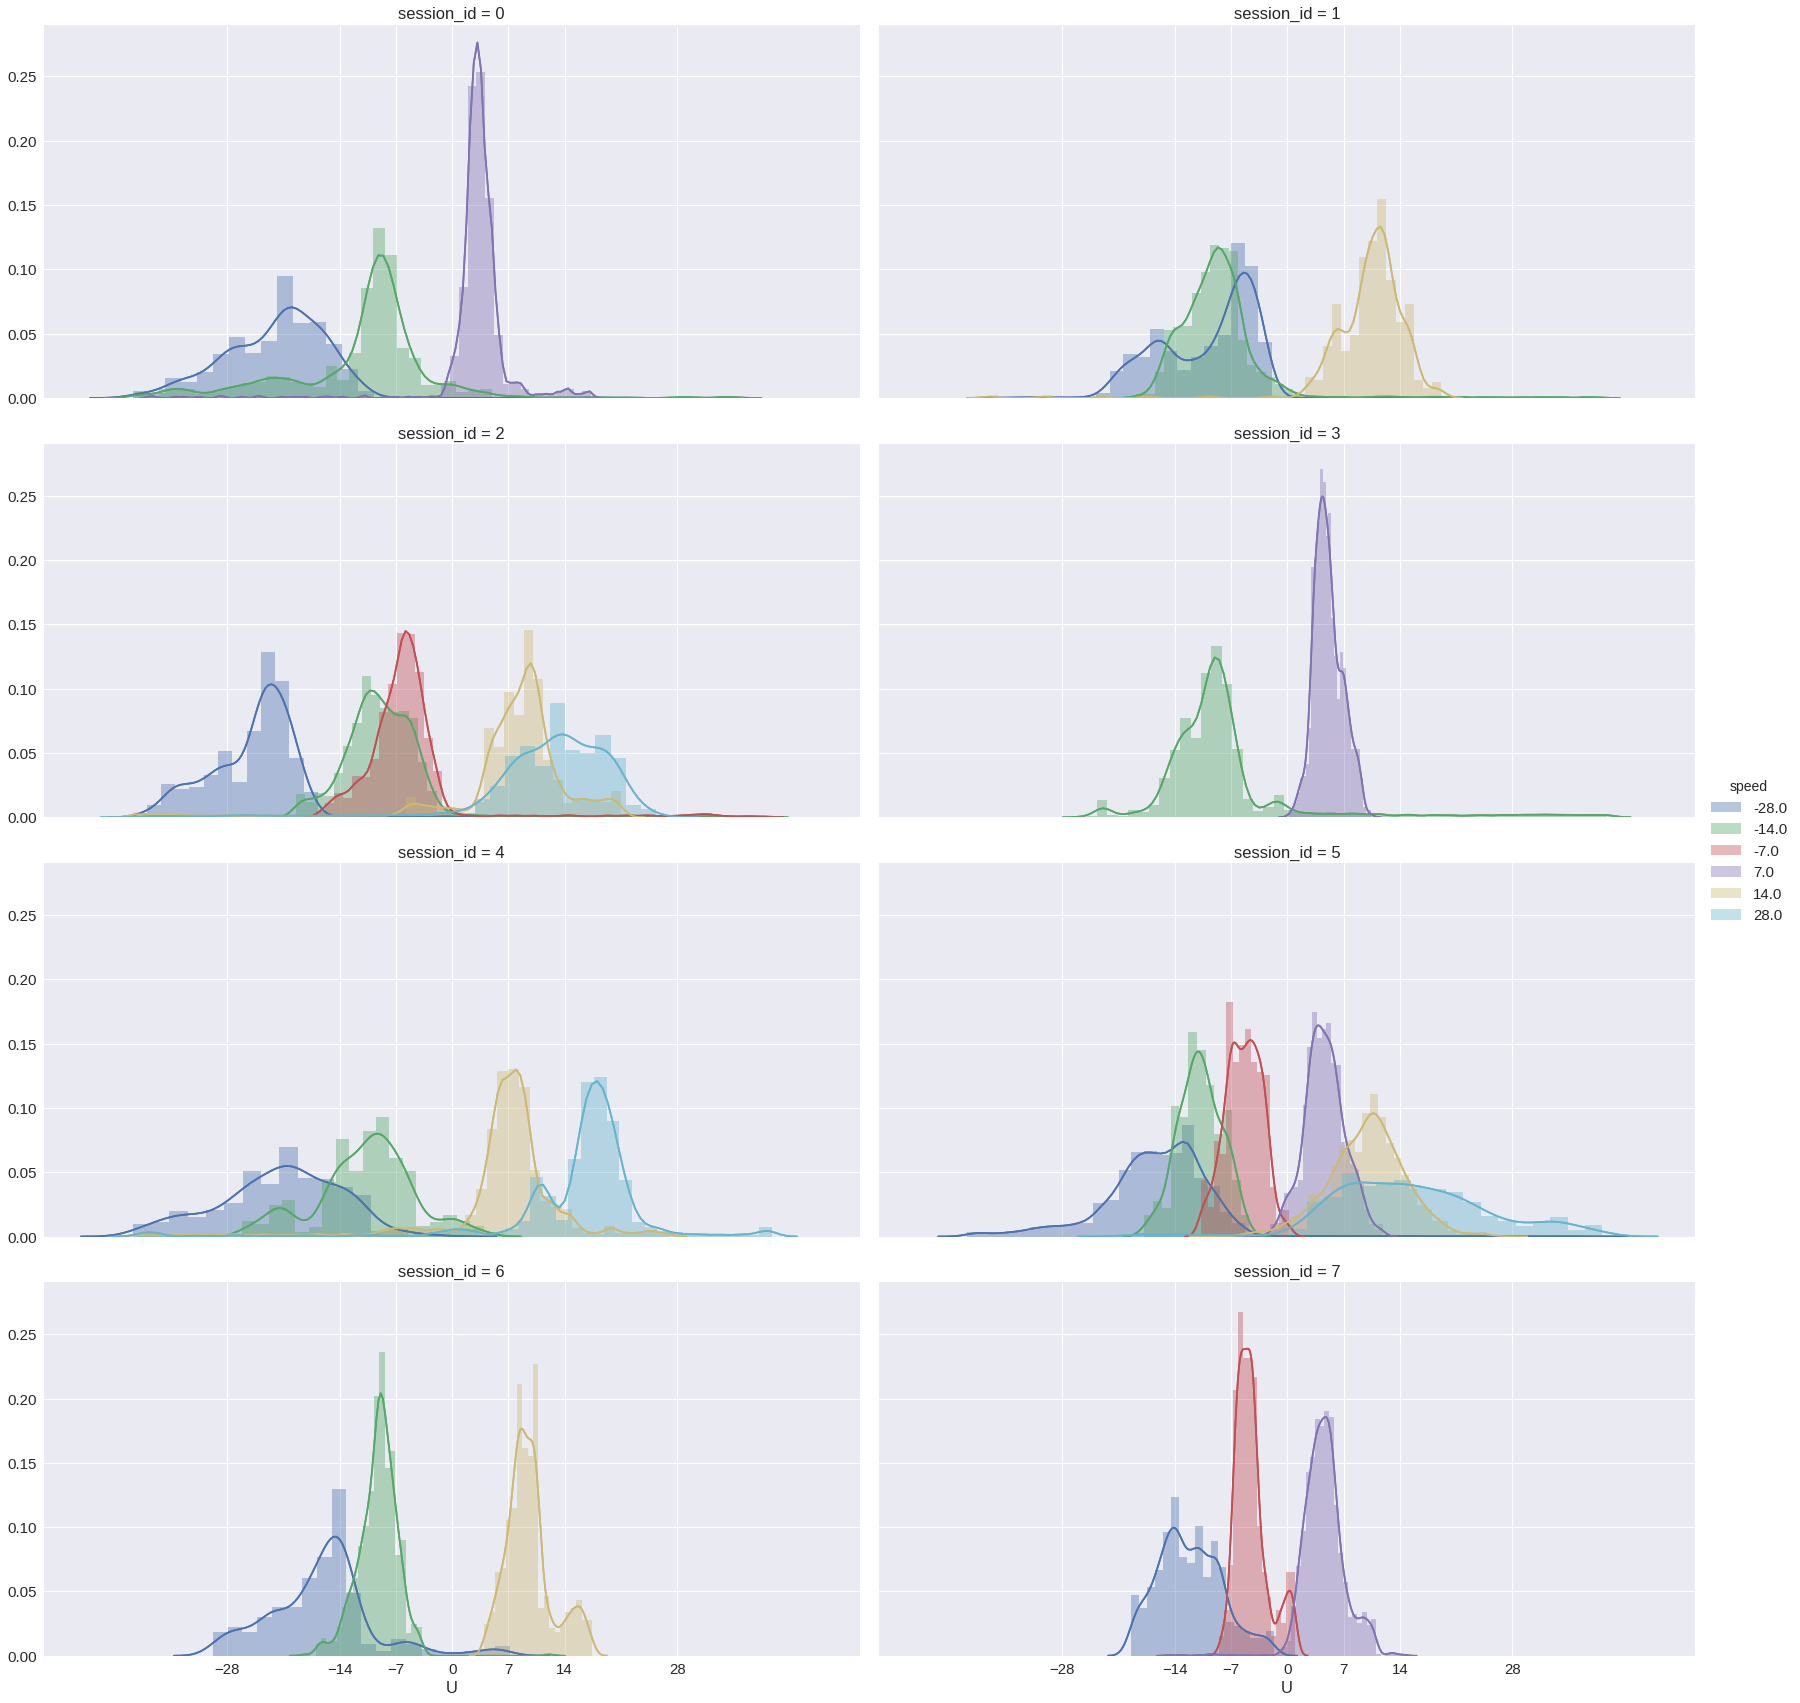

In [30]:
mask_srb = np.abs(SRB_up2.U) < 40
srb = SRB_up2[mask_srb]

g = sns.FacetGrid(data=srb, size=6, aspect=2, hue='speed', col='session_id', col_wrap=2);
g.map(sns.distplot, 'U');
g.set(xticks=[-28, -14, -7, 0, 7, 14, 28])
g.map(sns.kdeplot, 'U').add_legend()

## Checking SRBall2 with hand picked SRB

In [31]:
for Id in SRB.session_id.unique():
    p = len(SRB[SRB.session_id == Id]) / len(rat[rat.session_id == Id])
    print('SRB of session {:1}: {:.3%}'.format(Id, p) )

SRB of session 0: 1.995%
SRB of session 1: 2.165%
SRB of session 2: 3.568%
SRB of session 3: 1.281%
SRB of session 4: 2.175%
SRB of session 5: 5.629%
SRB of session 6: 0.997%
SRB of session 7: 2.081%


In [32]:
d= {'session ':[0,1,2,3,4,5,6,7], 'SRB [%]':[1.995,2.165,3.568,1.281,2.175,5.629,0.997,2.081]}
res = pd.DataFrame(d)
res2 = res.transpose()
res2

,0,1,2,3,4,5,6,7
SRB [%],1.995,2.165,3.568,1.281,2.175,5.629,0.997,2.081
session,0.000,1.000,2.000,3.000,4.000,5.000,6.000,7.000


In [33]:
# event velocities within SRB
for Id in SRB.speed.unique():
    p = len(SRB[SRB.speed == Id]) / len(SRB)
    print('SRB of velocity {:1}: {:.3%}'.format(Id, p) )

SRB of velocity -14.0: 21.808%
SRB of velocity -28.0: 24.753%
SRB of velocity 7.0: 18.074%
SRB of velocity 14.0: 16.787%
SRB of velocity -7.0: 8.302%
SRB of velocity 28.0: 10.277%


In [34]:
for Id in rat.session_id.unique():
    mask = (rat_up2.session_id == Id) & (rat_up2.SRBall2 == True)
    p = len(rat_up2[mask]) / len(rat[rat.session_id == Id])
    print('SRB of session {:1}: {:.3%}'.format(Id, p) )

SRB of session 0: 8.486%
SRB of session 1: 9.948%
SRB of session 2: 10.571%
SRB of session 3: 12.880%
SRB of session 4: 14.020%
SRB of session 5: 10.629%
SRB of session 6: 14.732%
SRB of session 7: 9.599%


In [35]:
import datashader as ds
from matplotlib import rcParams, cm

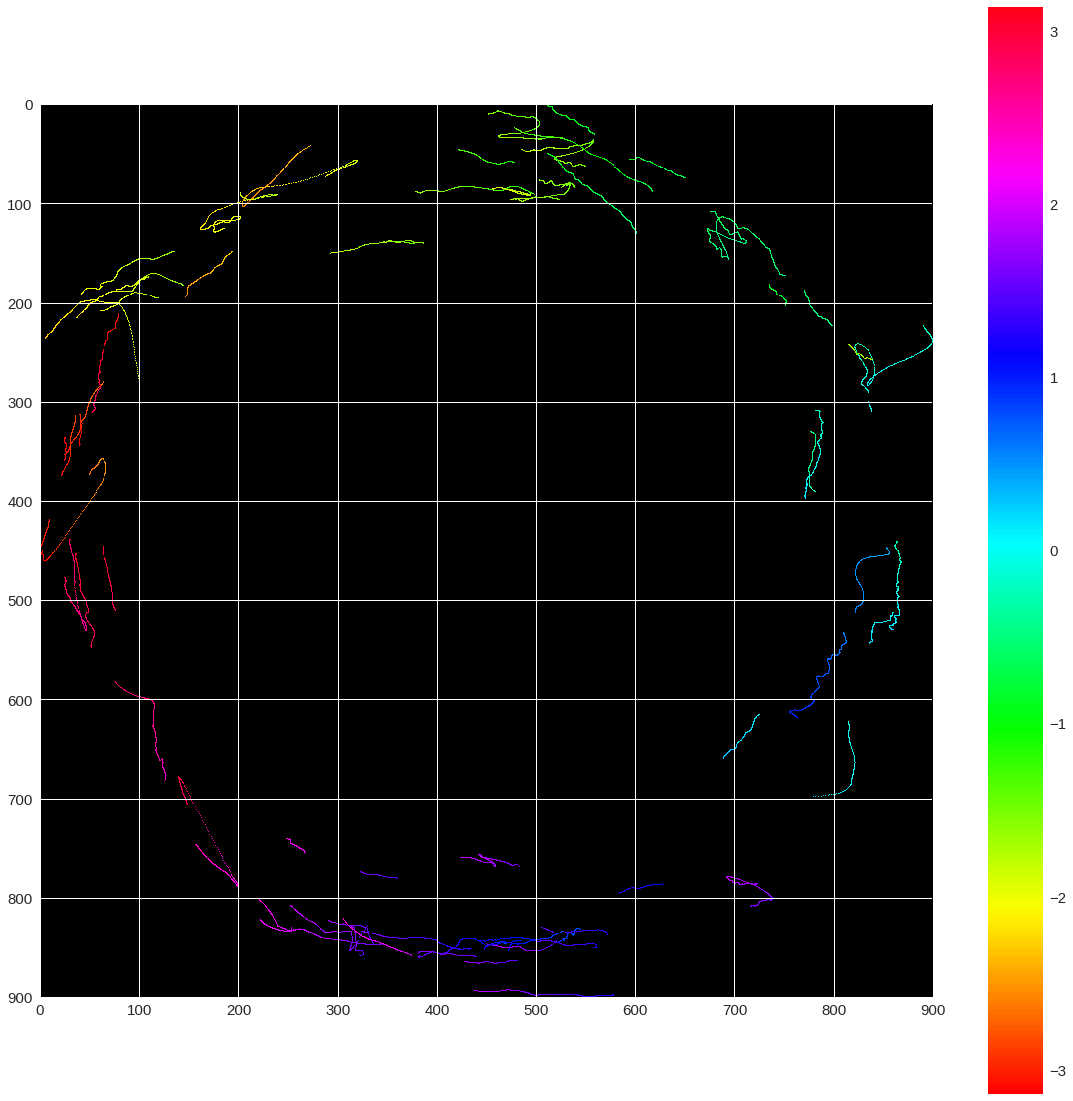

In [36]:
cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=SRB_up2, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=SRB_up2, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(20, 20))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar();

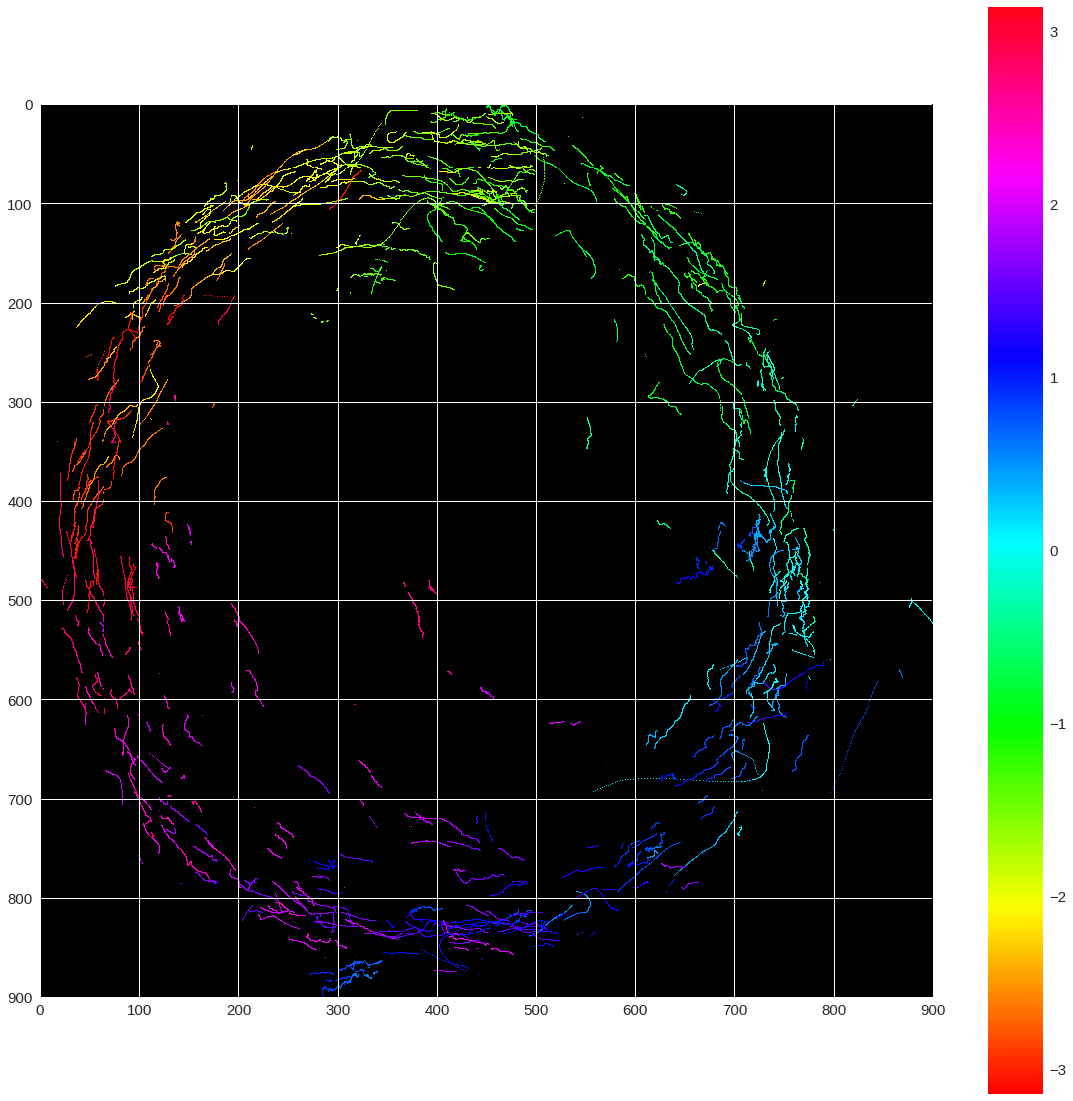

In [37]:
rat_SRB = rat_up2[rat_up2.SRBall2 == True]

cvs = ds.Canvas(plot_height=900, plot_width=900)
agg_z =cvs.points(source=rat_SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('Z_Ori'))
agg_x =cvs.points(source=rat_SRB, x='X_Pos', y='Z_Pos', agg=ds.mean('X_Ori'))


# np.linalg.norm(agg)
agg_xn = agg_x / np.sqrt(agg_x ** 2 + agg_z ** 2)
agg_zn = agg_z / np.sqrt(agg_x ** 2 + agg_z ** 2)

theta = np.arctan2(agg_zn, agg_xn)

cm.hsv.set_bad('black')
plt.figure(figsize=(20, 20))
plt.imshow(theta, cmap=cm.hsv)

plt.colorbar();